In [1]:
%matplotlib inline
!pip install scikit-learn
!pip install seaborn
!pip install geopandas matplotlib

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from glob import glob
import geopandas as gpd

from scipy.spatial import distance_matrix
from sklearn.preprocessing import MinMaxScaler

# Para no mostrar 'Future Warnings' producto de que algunos paquetes aún
# trabajan con versiones no actualizadas de otros paquetes
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
DATOS_generales = pd.read_csv('./datos_proyecto_general_filtrados.csv')
DATOS_genero = pd.read_csv('./dataset_nombre_genero.csv')
DATOS_genero_femenino = DATOS_genero[DATOS_genero['gender'].str.contains('F')].reset_index(drop=True)
DATOS_genero_masculino = DATOS_genero[DATOS_genero['gender'].str.contains('M')].reset_index(drop=True)

In [3]:
DATOS_generales['Nombre'] = DATOS_generales['Nombre'].str.split().str[0].str.lower().str.strip()
DATOS_genero_femenino['name']= DATOS_genero_femenino['name'].str.lower().str.strip()
DATOS_genero_masculino['name']= DATOS_genero_masculino['name'].str.lower().str.strip()

In [4]:
coincidencias_femenina = sum(DATOS_generales['Nombre'].isin(DATOS_genero_femenino['name']))
coincidencias_masculina = sum(DATOS_generales['Nombre'].isin(DATOS_genero_masculino['name']))
porcentaje_coincidencia_femenina = coincidencias_femenina / len(DATOS_generales) * 100
porcentaje_coincidencia_masculina = coincidencias_masculina / len(DATOS_generales) * 100
print('El porcentaje de coincidencia femenino es de:', porcentaje_coincidencia_femenina)
print('El porcentaje de coincidencia masculino es de:', porcentaje_coincidencia_masculina)
print('El porcentaje de coincidencia total es de:', porcentaje_coincidencia_femenina + porcentaje_coincidencia_masculina)

El porcentaje de coincidencia femenino es de: 75.90147783251233
El porcentaje de coincidencia masculino es de: 11.428571428571429
El porcentaje de coincidencia total es de: 87.33004926108376


In [5]:
(87.33004926108376*75.90147783251233/100)+(100-87.33004926108376)

78.95474871993983

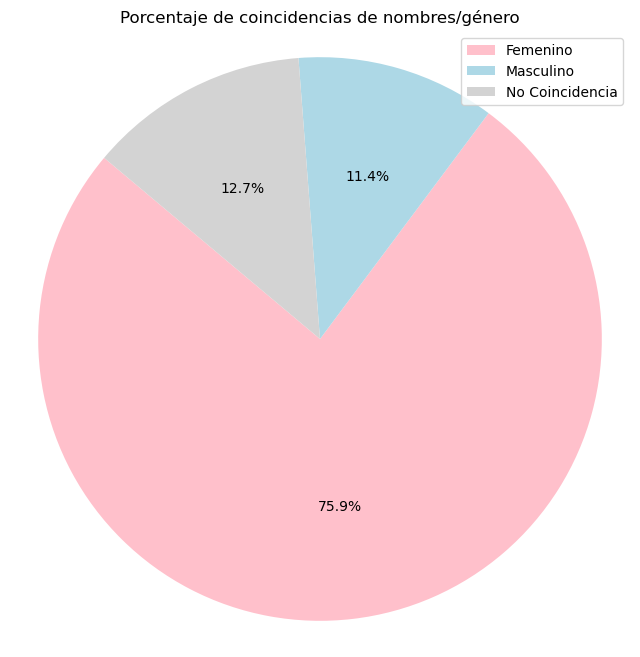

In [15]:
import matplotlib.pyplot as plt

# Calcular porcentaje de no coincidencia
porcentaje_no_coincidencia = 100 - porcentaje_coincidencia_femenina - porcentaje_coincidencia_masculina

# Etiquetas y porcentajes
etiquetas = ['Femenino', 'Masculino', 'No Coincidencia']
porcentajes = [porcentaje_coincidencia_femenina, porcentaje_coincidencia_masculina, porcentaje_no_coincidencia]

# Colores
colores = ['pink', 'lightblue', 'lightgrey']

# Crear la gráfica de tarta
plt.figure(figsize=(8, 8))
patches, texts, _ = plt.pie(porcentajes, colors=colores, startangle=140, autopct='%1.1f%%')

# Añadir leyenda
plt.legend(patches, etiquetas, loc="best")

# Añadir título
plt.title('Porcentaje de coincidencias de nombres/género')

# Mostrar la gráfica
plt.axis('equal')  # Aspecto de círculo

# Guardar como PNG
plt.savefig('grafico_género.png')

# Mostrar la gráfica
plt.show()
